#Chapter 1:Introduction and Installing NLTK

In [ ]:
!pip install -U nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
#nltk.download()

In [ ]:
dir(nltk)

['ARLSTem',
 'ARLSTem2',
 'AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'Cistem',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'Counter',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyG

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
print(stopwords.words('english')[0:100:10])
print(len(stopwords.words('english')))
stopwords.words('german')[0:10:1]

LookupError: ignored

#Chapter 2: Manipulating Text Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
rawdata = open('/content/drive/MyDrive/NLP_LinkedINLearningCourse/Ex_Files_NLP_Python_ML_EssT/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch01/01_03/Start/SMSSpamCollection.tsv').read()
print(rawdata[0:500])

ham	I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.
spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
ham	Nah I don't think he goes to usf, he lives around here though
ham	Even my brother is not like to speak with me. They treat me like aid


In [ ]:
from os import sep
import pandas as pd
dataset = pd.read_csv("/content/drive/MyDrive/NLP_LinkedINLearningCourse/Ex_Files_NLP_Python_ML_EssT/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch01/01_03/Start/SMSSpamCollection.tsv", sep = "\t", header = None)


In [ ]:
dataset.head()

,0,1
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [ ]:
dataset.columns = ['label','body_text']
dataset.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


Exploring the data

What is the shape of the dataset?

In [ ]:
print("Dataset has {} rows and {} columns".format(len(dataset),len(dataset.columns)))

Dataset has 5568 rows and 2 columns


How many spam/ham are present?

In [ ]:
print("From {} rows in the dataset, {} are spam messages and {} are ham messages".format(
    len(dataset),
    len(dataset[dataset['label'] == 'spam']),
    len(dataset[dataset['label'] == 'ham'])
))

From 5568 rows in the dataset, 746 are spam messages and 4822 are ham messages


How much data is missing?

In [ ]:
print("Number of null elements in label is {}".format(dataset['label'].isnull().sum()))
print("Number of null elements in Text_data is {}".format(dataset['body_text'].isnull().sum()))

Number of null elements in label is 0
Number of null elements in Text_data is 0


#NLP Basics - Regex

split()/findAll()

In [ ]:
import re
re_test = 'This is a test string for testing two different regex'
re_test_messy = "This                   is a test     string for testing      two different   regex methods"
re_test_messy_1 = "This-is-a-test-!!string-*for-testing=two-different>>>>>>>'regex"

In [ ]:
re_s = re.split('\s', re_test) #splits character based on the whitespaces
re_S = re.split('\S', re_test) #splits character based on the non-whitespaces.
re_Findall = re.findall('\S',re_test) #finds character based on the whitespaces.
print("small s",re_s)
print("Capital S",re_S)
print("Findall:",re_Findall)


small s ['This', 'is', 'a', 'test', 'string', 'for', 'testing', 'two', 'different', 'regex']
Capital S ['', '', '', '', ' ', '', ' ', ' ', '', '', '', ' ', '', '', '', '', '', ' ', '', '', ' ', '', '', '', '', '', '', ' ', '', '', ' ', '', '', '', '', '', '', '', '', ' ', '', '', '', '', '']
Findall: ['T', 'h', 'i', 's', 'i', 's', 'a', 't', 'e', 's', 't', 's', 't', 'r', 'i', 'n', 'g', 'f', 'o', 'r', 't', 'e', 's', 't', 'i', 'n', 'g', 't', 'w', 'o', 'd', 'i', 'f', 'f', 'e', 'r', 'e', 'n', 't', 'r', 'e', 'g', 'e', 'x']


In [ ]:
re_sPlus = re.split('\s+', re_test_messy) #splits character based on the whitespaces + can return multiple characters at a time 
re_SPlus = re.split('\S+',re_test_messy) #splits character based on the non-whitespaces + can return multiple characters at a time
re_Findall = re.findall('\S+',re_test_messy) #finds character based on the whitespaces + can return multiple characters at a time.
print("re_sPlus small s:",re_sPlus)
print("re_SPlus Capital S:",re_SPlus)
print("Findall:",re_Findall)

re_sPlus small s: ['This', 'is', 'a', 'test', 'string', 'for', 'testing', 'two', 'different', 'regex', 'methods']
re_SPlus Capital S: ['', '                   ', ' ', ' ', '     ', ' ', ' ', '      ', ' ', '   ', ' ', '']
Findall: ['This', 'is', 'a', 'test', 'string', 'for', 'testing', 'two', 'different', 'regex', 'methods']


In [ ]:
re_WPlus = re.split('\W+', re_test_messy_1) #splits character based on the special characters + can return multiple charcters at a time.
re_wPlus = re.split('\w+', re_test_messy_1) #splits character based on the non-special characters + can return multiple characters at a time.
re_Findall = re.findall('\w+',re_test_messy_1) #finds character based on the special characters + can return multiple characters at a time.
print("re_WPlus:",re_WPlus)
print("re_wPlus:",re_wPlus)
print("Findall:",re_Findall)

re_WPlus: ['This', 'is', 'a', 'test', 'string', 'for', 'testing', 'two', 'different', 'regex']
re_wPlus: ['', '-', '-', '-', '-!!', '-*', '-', '=', '-', ">>>>>>>'", '']
Findall: ['This', 'is', 'a', 'test', 'string', 'for', 'testing', 'two', 'different', 'regex']


Replacing Specific String

In [ ]:
pep8_test = "I try to follow PEP8 guidelines"
pep7_test = "I try to follow PEP7 guidelines"
peep8_test = "I try to follow PEEP8 guidelines"

In [ ]:
print(re.findall('[a-z]+',pep8_test)) #regex patterns for capturing lower case letters from a-z.
print(re.findall('[A-Z]+',pep8_test)) #regex patterns for capturing uppercase letters from A-Z.
print(re.findall('[A-z]+',pep8_test)) #regex patterns for capturing letters combinig lower case and upper case from A-z.
print(re.findall('[A-Z]+[0-9]',pep8_test)) #regex pattern for capturing PEP8 and the typos

['try', 'to', 'follow', 'guidelines']
['I', 'PEP']
['I', 'try', 'to', 'follow', 'PEP', 'guidelines']
['PEP8']


In [ ]:
print(re.findall('[A-Z]+[0-9]',pep7_test))
print(re.findall('[A-Z]+[0-9]',peep8_test))

['PEP7']
['PEEP8']


re.sub() method for replacing the specific string

In [ ]:
print(re.sub('[A-Z]+[0-9]','PEP8 Python Style',pep8_test)) #re.sub("regex pattern to find the string","String with which original string needs to be replaced","String in which the operarion need to be carried on")
print(re.sub('[A-Z]+[0-9]','PEP8 Python Style',pep7_test))
print(re.sub('[A-Z]+[0-9]','PEP8 Python Style',peep8_test))

I try to follow PEP8 Python Style guidelines
I try to follow PEP8 Python Style guidelines
I try to follow PEP8 Python Style guidelines


#Machine learning pipeline

1. Raw text - model cannot distinguish words
2. Clean text - remove punctuations, stop words, punctuations, stemming etc. 
3. Tokenize - telling model what to look at.
4. Vectorize - convert in numeric format
5. Training ML model - fit/train models on the data.
6. Spam filter - System to filter emails.

In [ ]:
# 1. Raw text
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/NLP_LinkedINLearningCourse/Ex_Files_NLP_Python_ML_EssT/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch01/01_03/Start/SMSSpamCollection.tsv', delimiter= '\t', header= None)
dataset.columns = ['label','text_data']
dataset.head()

,label,text_data
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [ ]:
#Removing Punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punct(text):
 text_nonpunct = "".join([char for char in text if char not in string.punctuation])
 return text_nonpunct

dataset['text_data_cleaned'] = dataset['text_data'].apply(lambda x: remove_punct(x))
dataset.head()

,label,text_data,text_data_cleaned
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


In [ ]:
#Tokenizing data
def tokenize(text):
  tokens = re.split('\W+', text)
  return tokens

dataset['text_data_tokenized'] = dataset['text_data_cleaned'].apply(lambda x: tokenize(x.lower()))
dataset.head()

,label,text_data,text_data_cleaned,text_data_tokenized
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


In [ ]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(tokenized_list):
  text_without_stopwords = ([word for word in tokenized_list if word not in stopword])
  return text_without_stopwords

dataset['text_data_noStop'] = dataset['text_data_tokenized'].apply(lambda x: remove_stopwords(x))
dataset.head()

,label,text_data,text_data_cleaned,text_data_tokenized,text_data_noStop
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


In [ ]:
print(stopword)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#Supplemental Data Cleaning


Stemming

In [ ]:
print(re.split('\W+',"some of the-words are+combined"))

['some', 'of', 'the', 'words', 'are', 'combined']


In [ ]:
ps = nltk.PorterStemmer()
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'vowels']

In [ ]:
result =  ps.stem('Meaning')
print(result)
#'run', 'running', and 'runner'

mean


In [ ]:
def stemming(tokenized_data):
 text = [ps.stem(word) for word in tokenized_data]
 return text

dataset['text_data_stemming'] = dataset['text_data_noStop'].apply(lambda x : stemming(x))
dataset.head()

,label,text_data,text_data_cleaned,text_data_tokenized,text_data_noStop,text_data_stemming
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


Lemmatizing

In [ ]:
wn = nltk.WordNetLemmatizer()

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
result = wn.lemmatize('meanness meaning')
print(result)

meanness meaning


In [ ]:
def lemmatize(tokenized_data):
 text = [wn.lemmatize(word) for word in tokenized_data]
 return text

dataset['text_data_lemmatized'] = dataset['text_data_noStop'].apply(lambda x : lemmatize(x))
dataset.head()

NameError: ignored

#Vectorizing: Count Vectorization




In [ ]:
import re
import nltk
import string
import pandas as pd
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLP_LinkedINLearningCourse/Ex_Files_NLP_Python_ML_EssT/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch02/02_02/Start/SMSSpamCollection.tsv", delimiter='\t', header=None)
df.columns = ['Label','Text_data']
df.head()

,Label,Text_data
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def clean_text(text):
  text = "".join([char for char in text if char not in string.punctuation])
  tokens = re.split('\W+',text)
  text = [wn.lemmatize(word.lower()) for word in tokens if word not in stopword] 
  return text


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(df['Text_data'])
print(X_counts.shape)
print(count_vect.get_feature_names_out())

(5568, 9013)
['' '0' '008704050406' ... 'ü' 'üll' '〨ud']


In [ ]:
data_sample  = df[0:20]

count_vect_sample = CountVectorizer(analyzer=clean_text)
X_counts_samples = count_vect_sample.fit_transform(data_sample['Text_data'])
print(X_counts_samples.shape)
print(count_vect_sample.get_feature_names_out())

(20, 219)
['08002986030' '08452810075over18s' '09061701461' '1' '100' '100000' '11'
 '12' '150pday' '16' '2' '20000' '2005' '21st' '3' '4' '4403ldnw1a7rw18'
 '4txtú120' '6days' '81010' '87077' '87121' '87575' '9' '900' 'a' 'aft'
 'aid' 'already' 'anymore' 'apply' 'ard' 'around' 'b' 'blessing'
 'breather' 'brother' 'call' 'caller' 'callertune' 'camera' 'cash'
 'chance' 'claim' 'click' 'co' 'code' 'colour' 'comin' 'comp' 'copy'
 'cost' 'credit' 'cried' 'csh11' 'cup' 'customer' 'da' 'date' 'dont' 'eg'
 'eh' 'england' 'enough' 'entitled' 'entry' 'even' 'fa' 'feel' 'final'
 'fine' 'finish' 'first' 'free' 'friend' 'from' 'fulfil' 'go' 'goalsteam'
 'going' 'gonna' 'gota' 'granted' 'ha' 'had' 'have' 'he' 'help' 'hl'
 'home' 'hour' 'httpwap' 'i' 'im' 'info' 'is' 'ive' 'jackpot' 'joking' 'k'
 'kim' 'kl341' 'lar' 'latest' 'lccltd' 'life' 'like' 'link' 'lor' 'lunch'
 'macedonia' 'make' 'may' 'melle' 'membership' 'message' 'minnaminunginte'
 'miss' 'mobile' 'month' 'nah' 'name' 'national' 'naughty'

Vectorizers output sparse matrices

Sparse Matrix: A matrix in which most entries are zero. In the interest of efficient storgae, a sparse matrix will only be stored by only storing locations of the non zero elements.

In [ ]:
X_counts_samples

<20x219 sparse matrix of type '<class 'numpy.int64'>'
	with 253 stored elements in Compressed Sparse Row format>

The below Document term matrix for a sample dataset 20*219. Each row represents one message from SMSCollection.csv and Each Coulmns are labels of each Unique word occuring in the sample dataset and the values represent the number of occurences of each word in respective messages. 

In [ ]:
X_counts_samples_df = pd.DataFrame(X_counts_samples.toarray())
X_counts_samples_df

,0,1,2,3,4,5,6,7,8,9,...,209,210,211,212,213,214,215,216,217,218
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Getting the actual features names (Words) as Columns headers.
X_counts_samples_df.columns = count_vect_sample.get_feature_names_out()
X_counts_samples_df

,08002986030,08452810075over18s,09061701461,1,100,100000,11,12,150pday,16,...,wkly,wonderful,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,yes,you,ü
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


#2. Vectorizing Raw Data : N-Grams

N-Grams creates a document term matrix where counts still occupy the cell but instead of the Columns representing the single terms, they represents all the combination of adjacent words of length n in your text.

Ex: "NLP is an intresting topic"



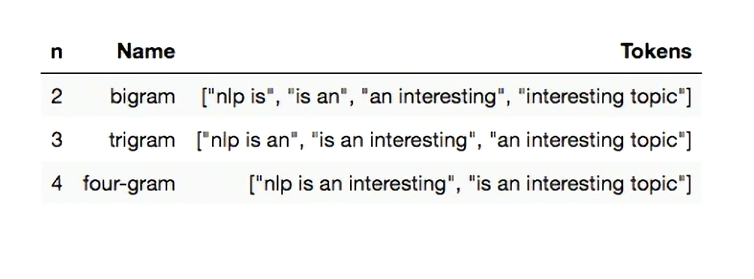

In [ ]:
def clean_text_n_grams(text):
  text = "".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split('\W+',text)
  text = " ".join([wn.lemmatize(word) for word in tokens if word not in stopword]) 
  return text

df['Cleaned_Text_NGrams'] = df['Text_data'].apply(lambda x: clean_text_n_grams(x))
df.head()

,Label,Text_data,Cleaned_Text_NGrams
0,ham,I've been searching for the right words to tha...,ive searching right word thank breather promis...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though
3,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday


Applying CountVectorizer (w/N-Grams)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
ngram_vect = CountVectorizer(ngram_range=(2,2))
X_counts_ngram = ngram_vect.fit_transform(df['Cleaned_Text_NGrams'])
print(X_counts_ngram.shape)
print(ngram_vect.get_feature_names_out())

(5568, 31636)
['008704050406 sp' '0089my last' '0121 2025050' ... 'üll submitting'
 'üll take' '〨ud evening']


Applying CountVectorizer to smaller Samples

In [ ]:
ngram_df_sample = df[0:20]
ngram_vect_sample = CountVectorizer(ngram_range=(1,3))
X_counts_ngram_sample = ngram_vect_sample.fit_transform(ngram_df_sample['Cleaned_Text_NGrams'])
print(X_counts_ngram_sample.shape)
print(ngram_vect_sample.get_feature_names_out())

(20, 589)
['08002986030' '08452810075over18s' '09061701461' '09061701461 claim'
 '09061701461 claim code' '100' '100 20000' '100 20000 pound' '100000'
 '100000 prize' '100000 prize jackpot' '11' '11 month' '11 month entitled'
 '12' '12 hour' '150pday' '150pday 6days' '150pday 6days 16' '16'
 '16 tsandcs' '16 tsandcs apply' '20000' '20000 pound' '20000 pound txt'
 '2005' '2005 text' '2005 text fa' '21st' '21st may' '21st may 2005'
 '4403ldnw1a7rw18' '4txtú120' '4txtú120 poboxox36504w45wq'
 '4txtú120 poboxox36504w45wq 16' '6days' '6days 16' '6days 16 tsandcs'
 '81010' '81010 tc' '81010 tc wwwdbuknet' '87077' '87077 eg'
 '87077 eg england' '87077 trywales' '87077 trywales scotland' '87121'
 '87121 receive' '87121 receive entry' '87575' '87575 cost'
 '87575 cost 150pday' '900' '900 prize' '900 prize reward' 'aft'
 'aft finish' 'aft finish lunch' 'aid' 'aid patent' 'already' 'anymore'
 'anymore tonight' 'anymore tonight ive' 'apply'
 'apply 08452810075over18s' 'apply reply' 'apply reply hl'

In [ ]:
Xcounts_ngram_samples_df = pd.DataFrame(X_counts_ngram_sample.toarray())
#Getting the actual features names (Words) as Columns headers.
Xcounts_ngram_samples_df.columns = ngram_vect_sample.get_feature_names_out()
Xcounts_ngram_samples_df

,08002986030,08452810075over18s,09061701461,09061701461 claim,09061701461 claim code,100,100 20000,100 20000 pound,100000,100000 prize,...,wwwdbuknet,wwwdbuknet lccltd,wwwdbuknet lccltd pobox,xxxmobilemovieclub,xxxmobilemovieclub use,xxxmobilemovieclub use credit,xxxmobilemovieclubcomnqjkgighjjgcbl,yes,yes naughty,yes naughty make
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#Vectorization: TF-IDF Vectorizer (Inverse Document Frequency Weighting)

It works same as CountVectorizer but instead of storing the counts, it stores the weights of the words in the cells, indicating how important the word is to the sentence.



In [ ]:
df_tf = pd.read_csv("/content/drive/MyDrive/NLP_LinkedINLearningCourse/Ex_Files_NLP_Python_ML_EssT/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch02/02_02/Start/SMSSpamCollection.tsv", delimiter='\t', header=None)
df_tf.columns = ['Label','Text_data']
df_tf.head()

,Label,Text_data
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


Removing Punctuation, tokenize, removing Stopwords and Lemmatizing

In [ ]:
def clean_text_tf(text):
  text = "".join([char for char in text if char not in string.punctuation])
  tokens = re.split('\W+',text)
  text = [wn.lemmatize(word.lower()) for word in tokens if word not in stopword] 
  return text

Applying TFIDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer=clean_text_tf)
X_tfidf = tfidf_vect.fit_transform(df_tf['Text_data'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names_out())

(5568, 9013)
['' '0' '008704050406' ... 'ü' 'üll' '〨ud']


Applying TFIDF Vectorizer to a smaller data sample

In [ ]:
tfidf_sample = df_tf[0:20]

tfidf_vect_samples = TfidfVectorizer(analyzer=clean_text_tf)
X_tfidf_samples = tfidf_vect_samples.fit_transform(tfidf_sample['Text_data'])
print(X_tfidf_samples.shape)
print(tfidf_vect_samples.get_feature_names_out())

(20, 219)
['08002986030' '08452810075over18s' '09061701461' '1' '100' '100000' '11'
 '12' '150pday' '16' '2' '20000' '2005' '21st' '3' '4' '4403ldnw1a7rw18'
 '4txtú120' '6days' '81010' '87077' '87121' '87575' '9' '900' 'a' 'aft'
 'aid' 'already' 'anymore' 'apply' 'ard' 'around' 'b' 'blessing'
 'breather' 'brother' 'call' 'caller' 'callertune' 'camera' 'cash'
 'chance' 'claim' 'click' 'co' 'code' 'colour' 'comin' 'comp' 'copy'
 'cost' 'credit' 'cried' 'csh11' 'cup' 'customer' 'da' 'date' 'dont' 'eg'
 'eh' 'england' 'enough' 'entitled' 'entry' 'even' 'fa' 'feel' 'final'
 'fine' 'finish' 'first' 'free' 'friend' 'from' 'fulfil' 'go' 'goalsteam'
 'going' 'gonna' 'gota' 'granted' 'ha' 'had' 'have' 'he' 'help' 'hl'
 'home' 'hour' 'httpwap' 'i' 'im' 'info' 'is' 'ive' 'jackpot' 'joking' 'k'
 'kim' 'kl341' 'lar' 'latest' 'lccltd' 'life' 'like' 'link' 'lor' 'lunch'
 'macedonia' 'make' 'may' 'melle' 'membership' 'message' 'minnaminunginte'
 'miss' 'mobile' 'month' 'nah' 'name' 'national' 'naughty'

Vectorizer Output Sparse Matrices

In [ ]:
X_tfidf_df = pd.DataFrame(X_tfidf_samples.toarray())
X_tfidf_df.columns = tfidf_vect_samples.get_feature_names_out()
X_tfidf_df

,08002986030,08452810075over18s,09061701461,1,100,100000,11,12,150pday,16,...,wkly,wonderful,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,yes,you,ü
0,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.230352,0.230352,0.202483,0.00000,0.000000,0.000000,0.000000,0.202483,0.000000
1,0.000000,0.198986,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.198986,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.223396,0.00000,0.000000,0.00000,0.000000,0.223396,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.190382,0.000000,0.000000,0.00000,0.000000,0.00000,0.190382,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.00000,0.219424,0.00000,0.000000,0.000000,0.219424,0.192877,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


#Feature Engineering: Feature Creation

In [ ]:
data_feature = pd.read_csv("/content/drive/MyDrive/NLP_LinkedINLearningCourse/Ex_Files_NLP_Python_ML_EssT/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch02/02_02/Start/SMSSpamCollection.tsv", delimiter='\t', header=None)
data_feature.columns = ['Label','Text_data']

Creating Feature for text message length

In [ ]:
from nltk.featstruct import Feature
data_feature['Text_data_len'] = data_feature['Text_data'].apply(lambda x: len(x) - x.count(" "))
data_feature.head()

,Label,Text_data,Text_data_len
0,ham,I've been searching for the right words to tha...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",49
3,ham,Even my brother is not like to speak with me. ...,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


Creating Feature for % of text that is punctuation

In [ ]:
import string

def count_punct(text):
   count = sum([1 for char in text if char in string.punctuation])
   return round(count/(len(text) - text.count(" ")), 3)*100

data_feature['Punct_%'] = data_feature['Text_data'].apply(lambda x : count_punct(x))
data_feature.head()

,Label,Text_data,Text_data_len,Text_data_punct_per,Punct_%
0,ham,I've been searching for the right words to tha...,160,2.5,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1,7.1


#Evaluating Created Features

In [ ]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

Evaluating the feature Length of texts across two classes.

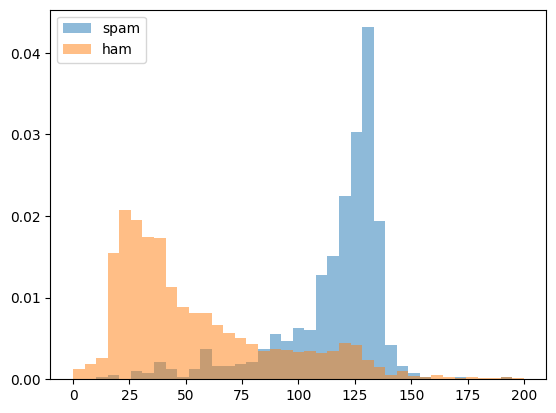

In [ ]:
bins = np.linspace(0,200,40)
pyplot.hist(data_feature[data_feature['Label'] =='spam']['Text_data_len'],bins, alpha=0.5, density=True, label='spam')
pyplot.hist(data_feature[data_feature['Label'] =='ham']['Text_data_len'],bins, alpha=0.5, density=True, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

Evaluating the feature Puctuation percentage.

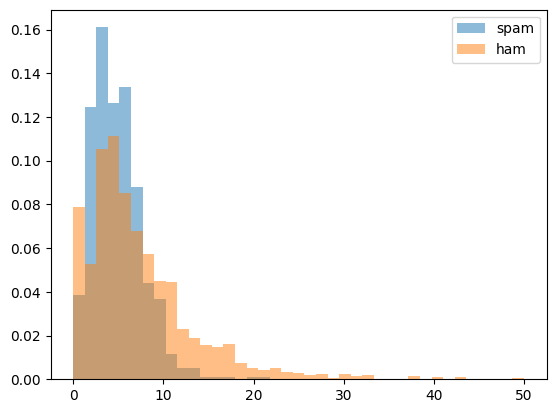

In [ ]:
bins = np.linspace(0,50,40)
pyplot.hist(data_feature[data_feature['Label'] =='spam']['Punct_%'],bins, alpha=0.5, density=True, label='spam')
pyplot.hist(data_feature[data_feature['Label'] =='ham']['Punct_%'],bins, alpha=0.5, density=True, label='ham')
pyplot.legend(loc='upper right')
pyplot.show()

# Identifying features for transformation

Looking at the complete distribution rather than looking over the distribution across the classes.

1. Text body length

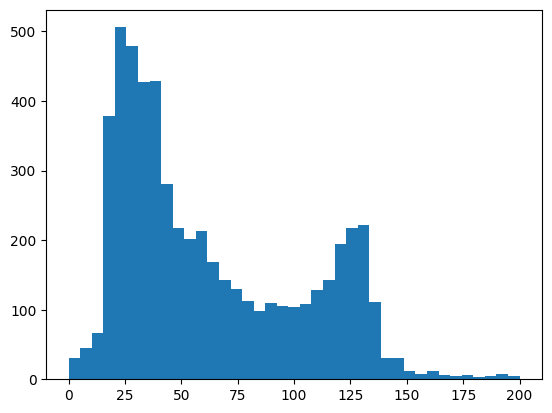

In [ ]:
bins = np.linspace(0,200,40)
pyplot.hist(data_feature['Text_data_len'],bins)
pyplot.show()

The above distribution for the text length is not the great candidate for feature_transformation because it is not that skewed distribution moreover it does not have much of outliers.

Punctuation

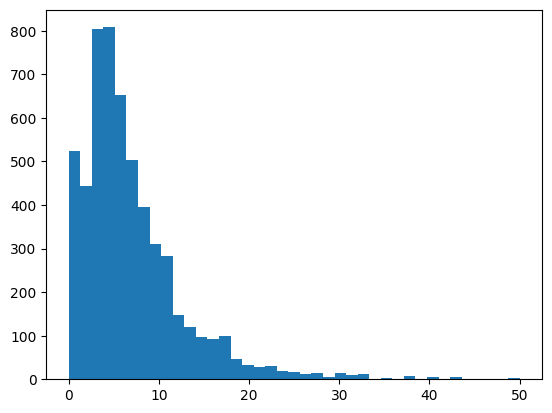

In [ ]:
bins = np.linspace(0,50,40)
pyplot.hist(data_feature['Punct_%'],bins)
pyplot.show()

The above distribution of Punctuations is a good candidate for the feature transformation as it is a skewed distribution, near zero and also contains the outliers near the end, which might introduce the bias in the model, if it digs a lot towards the end.

#Box-Cox Power Transformation

What is Transformation?

Transformation is a process which alters each data point in a certain column in a systematic way which makes the data cleaner for the model to use. Genrally we undergo this process so that the model dont get distracted chasing the outliers.

Ex: Convert the value into squares or take the square root of the values etcetera. 

### Box-Cox Power Transformation

**Base Form**: $$ y^x $$

| X    | Base Form           |           Transformation               |
|------|--------------------------|--------------------------|
| -2   | $$ y ^ {-2} $$           | $$ \frac{1}{y^2} $$      |
| -1   | $$ y ^ {-1} $$           | $$ \frac{1}{y} $$        |
| -0.5 | $$ y ^ {\frac{-1}{2}} $$ | $$ \frac{1}{\sqrt{y}} $$ |
| 0    | $$ y^{0} $$              | $$ log(y) $$             |
| 0.5  | $$ y ^ {\frac{1}{2}}  $$ | $$ \sqrt{y} $$           |
| 1    | $$ y^{1} $$              | $$ y $$                  |
| 2    | $$ y^{2} $$              | $$ y^2 $$                |


**Process**
1. Determine what range of exponents to test
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best distribution

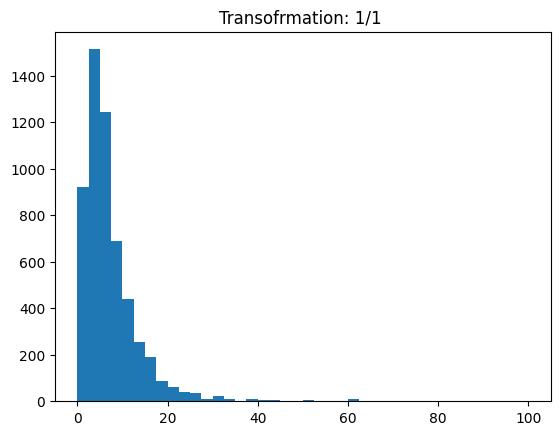

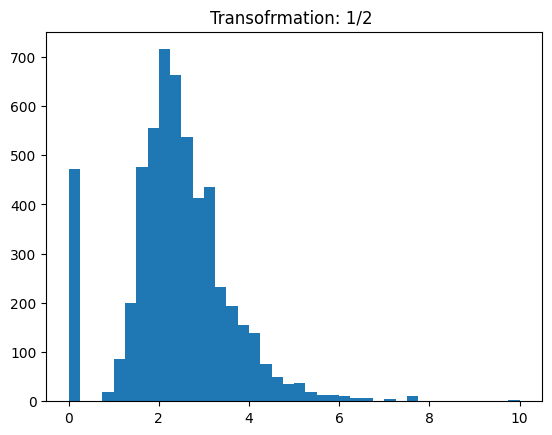

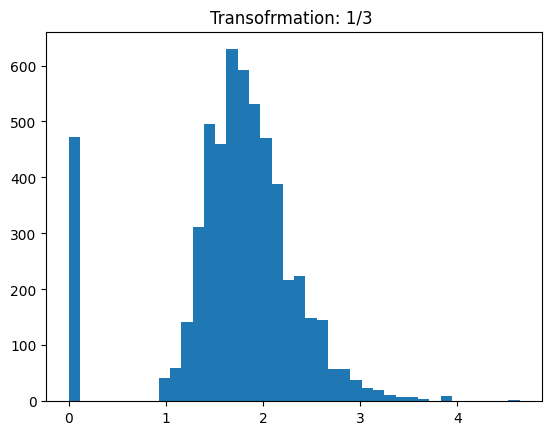

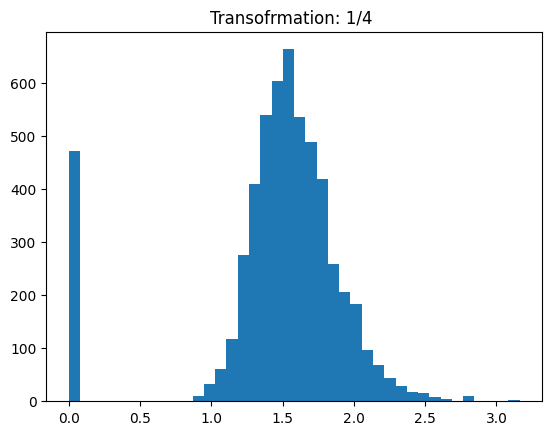

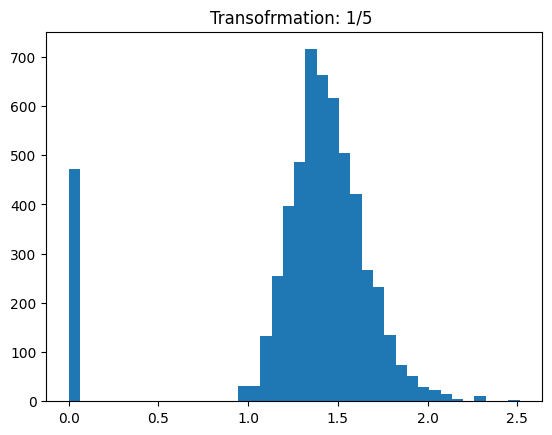

In [ ]:
for i in [1,2,3,4,5]:
  pyplot.hist((data_feature['Punct_%'])** (1/i), bins = 40)
  pyplot.title("Transofrmation: 1/{} ".format(str(i)))
  pyplot.show()

We can see applying the transformations, the outliers are skewed towards the dense data, reducing the bias in the model.

#Building Machine Learning Classifiers

1. Random Forest Classifier

In [ ]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
wn= nltk.WordNetLemmatizer()

data = pd.read_csv("/content/drive/MyDrive/NLP_LinkedINLearningCourse/SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']
data.columns = data.columns.astype(str)


def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8901,8902,8903,8904,8905,8906,8907,8908,8909,8910
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Explore RandomForestClassifier through Holdout Set

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [ ]:
X_train.columns = X_train.columns.astype(str)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs= -1)
rf_model = rf.fit(X_train,y_train)

In [ ]:
sorted(zip(rf_model.feature_importances_,X_train.columns), reverse=True)[0:10]

[(0.060074735933586004, 'body_len'),
 (0.042150028171651366, '8100'),
 (0.04094629716609041, '1899'),
 (0.0306315078096537, '5239'),
 (0.023665304969060403, '392'),
 (0.023212506783303114, '2154'),
 (0.021781791977432307, '6915'),
 (0.017042062967207557, '8224'),
 (0.016352475666354022, '6570'),
 (0.015226709778680401, '6252')]

In [ ]:
X_test.columns = X_test.columns.astype(str)


In [ ]:
y_pred = rf_model.predict(X_test)
precison, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average = 'binary')

In [ ]:
print("Precision: {} / Recall: {} / Accuracy: {}".format(round(precison,3),
                                                         round(recall,3),
                                                         round((y_pred == y_test).sum()/len(y_pred))))

Precision: 1.0 / Recall: 0.559 / Accuracy: 1


As we can see that the Recall score is not so good, that is our model is classfying only 55% of spam messages as spam, others are still catrgorized as ham. We will carry out HyperParamter tuning for improving the performance of our model. 

### Using Grid-search for HyperParamenter Tuning

In [ ]:
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
    print('Est: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, depth, round(precision, 3), round(recall, 3),
        round((y_pred==y_test).sum() / len(y_pred), 3)))

In [ ]:
for n_est in [10, 50, 100]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ---- Precision: 1.0 / Recall: 0.211 / Accuracy: 0.892
Est: 10 / Depth: 20 ---- Precision: 0.988 / Recall: 0.533 / Accuracy: 0.935
Est: 10 / Depth: 30 ---- Precision: 1.0 / Recall: 0.651 / Accuracy: 0.952
Est: 10 / Depth: None ---- Precision: 1.0 / Recall: 0.724 / Accuracy: 0.962
Est: 50 / Depth: 10 ---- Precision: 1.0 / Recall: 0.145 / Accuracy: 0.883
Est: 50 / Depth: 20 ---- Precision: 1.0 / Recall: 0.586 / Accuracy: 0.943
Est: 50 / Depth: 30 ---- Precision: 1.0 / Recall: 0.678 / Accuracy: 0.956
Est: 50 / Depth: None ---- Precision: 1.0 / Recall: 0.822 / Accuracy: 0.976
Est: 100 / Depth: 10 ---- Precision: 1.0 / Recall: 0.164 / Accuracy: 0.886
Est: 100 / Depth: 20 ---- Precision: 1.0 / Recall: 0.566 / Accuracy: 0.941
Est: 100 / Depth: 30 ---- Precision: 1.0 / Recall: 0.704 / Accuracy: 0.96
Est: 100 / Depth: None ---- Precision: 1.0 / Recall: 0.803 / Accuracy: 0.973


#Using GridSearchCV for HyperParameter Settings

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import GridSearchCV

In [ ]:
X_features.columns = X_features.columns.astype(str)


In [ ]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_features, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,41.202588,1.123687,0.417721,0.011769,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.978456,0.977558,0.973944,0.965858,0.973944,0.973952,0.004445,1
6,2.056082,0.537021,0.199725,0.072902,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.977558,0.975763,0.974843,0.967655,0.972147,0.973593,0.003445,2
10,22.153442,1.191765,0.298883,0.008826,None,150,"{'max_depth': None, 'n_estimators': 150}",0.980251,0.976661,0.973944,0.965858,0.971249,0.973593,0.004882,3
11,42.168611,5.998234,0.508710,0.206705,None,300,"{'max_depth': None, 'n_estimators': 300}",0.978456,0.977558,0.974843,0.966757,0.969452,0.973413,0.004575,4
7,19.675900,0.606437,0.346897,0.121574,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.977558,0.979354,0.973046,0.964061,0.970350,0.972874,0.005440,5


In [ ]:
best_params = gs_fit.best_params_
print(best_params)

{'max_depth': 90, 'n_estimators': 300}


In [ ]:
rf_best_params = RandomForestClassifier(n_estimators=300, max_depth=90, n_jobs=-1)
rf_model_best_params = rf.fit(X_train, y_train)
y_pred_best_params = rf_model_best_params.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')

In [ ]:
print("Precision: {} / Recall: {} / Accuracy: {}".format(round(precison,3),
                                                         round(recall,3),
                                                         round((y_pred == y_test).sum()/len(y_pred))))

Precision: 1.0 / Recall: 0.559 / Accuracy: 1
